# Análise de dados do Titanic

## Introdução

O conjunto utilizado na análise contém dados demográficos e informações de 891 dos 2.224 passageiros e tripulantes a bordo do Titanic. Você pode ver uma descrição deste conjunto de dados no site do Kaggle https://www.kaggle.com/c/titanic/data, de onde os dados foram tirados.

## Perguntas 

Quais o fatores que contribuiram para a maioria dos sobreviventes serem compostos de  mulheres e pessoas de altos status economicos?

**1. O nível social e economico dos passageiros influenciaram nas chances de sobrevivencia?**

**2. Havia mais homens ou mulheres de baixos niveis sociais e economicos entre os sobreviventes?**

**3. Mulheres adultas com criancas e de alta classe social e economica sobreviveram mais do que mulheres adultas sem criancas e de baixa classe?**

**4. Os passageiros que pertenciam a altas classes sociais e que sobreviveram embarcaram em qual porto?**

**Suposição:** Vamos assumir que as pessoas que sobreviveram conseguiram entrar nos botes salva vidas.


# Preparação dos Dados

## Descrição dos Dados
(fonte: https://www.kaggle.com/c/titanic/data)

- **Survived:** Se sobreviveu ou não (0 = No; 1 = Yes)

- **pclass:** Classe de embarque (1 = 1st; 2 = 2nd; 3 = 3rd)

- **name:** Nome 

- **sex:** Sexo

- **age:** Idade

- **sibsp:** Número de irmãos ou conjuges a bordo

- **parch:** Número de pais/criancas a bordo

- **ticket:** Número do Ticket

- **fare:** Tarifa de passageiros

- **cabin:** Cabine

- **embarked:** Porto de embarcação (C = Cherbourg; Q = Queenstown; S = Southampton)

**Observações:**
- Pclass foi utilizado para definir status socio econômico (1 = Alto; 2 =  Meio; 3 = Baixo)
- O dado age(idade) está em anos; Fracionário se Idade menor que um (1). Se a Idade for Estimada, ela estará no formato xx.5


Com relação às variáveis de relação familiar (sibsp e parch) algumas relações foram ignoradas como noivos/noivas e amantes. A seguir estão as definições usadas para sibsp e parch.


- **Irmão:** irmão, irmã, meio irmão ou irmã-irmã do passageiro a bordo do Titanic
- **Cônjuge:** Marido ou Esposa do Passageiro a bordo do Titanic 
- **Pais:** Mãe ou pai do passageiro a bordo do Titanic
- **Criança:** Filho, Filha, Enteado ou Enteada do Passageiro a bordo do Titanic

In [522]:
# Importacao das bibliotecas
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")

# Ler o dataset e cria o dataframe que será utilizado na análise
df = pd.read_csv('titanic-data-6.csv', sep=',')

# Mostra os primeiros dados do dataframe, para análise e formatacao
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [523]:
# Mostra os últimos registros como forma de revisar os dados e formatá-los
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Limpeza de Dados
É posssivel perceber que algumas colunas estão com valores indefinidos ou possuem o valor **NaN**, como **Age** e **Cabin**. Além disso, **Cabin** e **Ticket** por serem do tipo alfanúmerico não possuem impacto na análise atual. Outras colunas que a partir da descricao de dados pude perceber que não são importantes para análise atual são **PassengerId**, **Name** e **Fare**
A
Assim, antes de comecar a análise irei realizar uma limpeza de dados no dataset seguindo tres abordagens que serão demonstradas a seguir: 

**1. Identificar e remover qualquer entrada duplicada**
Para verificar se existiam dados duplicados no dataset executei o seguinte teste nos dados

In [524]:
# Identifica dados duplicados
data_duplicates = df.duplicated()
print ('A quantidade de entradas duplicadas é igual a {}'.format(data_duplicates.sum()))

A quantidade de entradas duplicadas é igual a 0


Com o resultado do primeiro teste, acima pude perceber que não existiam dados duplicados no dataset, mas para ter certeza que o comando utilizado estava dando o resultado correto realizei um teste a mais.

In [525]:
# Teste para verificar se o comando utilizado no teste anterior está retornando o resultado correto
duplicate_test = df.duplicated('Age').head()
print ('A quantidade de entradas duplicadas para a coluna Age é igual a {}'.format(duplicate_test.sum()))

A quantidade de entradas duplicadas para a coluna Age é igual a 1


**Obs:** Dado o resultado do segundo teste que comprovou que o primeiro estava correto, não foi necessário remover dados duplicados.

**2. Remover colunas desnecessárias**
Para remover as colunas desnecessárias executei o comando **drop** para criar uma novo dataset que foram tratados na abordagem anteriror.

**Colunas que foram removidas:**
- ** PassengerId**
- ** Name**
- ** Ticket**
- ** Cabin**
- ** Fare**

In [526]:
# Cria um novo dataset sem as colunas que foram removidas
dataset_cleaned = df.drop(['PassengerId','Name','Ticket','Cabin','Fare'], axis=1)
dataset_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


**3. Arrumar o formato e dados faltando das entradas**

A primeira etapa dessa abordagem é saber a quantidade de valores que estão faltando.

In [527]:
# Calcula a quantidade de valores faltando
dataset_cleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

A coluna **Age** possui 177 valores faltando, asssim se faz necessário verificar esses dados.

In [528]:
# Verificando alguns dados faltando da coluna Age
missing_age_bool = pd.isnull(dataset_cleaned['Age'])
dataset_cleaned[missing_age_bool].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
5,0,3,male,NaN,0,0,Q
17,1,2,male,NaN,0,0,S
19,1,3,female,NaN,0,0,C
26,0,3,male,NaN,0,0,C
28,1,3,female,NaN,0,0,Q


Olhando para as colunas **Sex** e **Age** pude perceber a possibilidade de dividir a análise em duas partes, onde analisaria os dados por genero dos passageiros essa estratégia pode ser observada a seguir.

In [529]:
# A quantidade de mulheres com dados de idade faltando
missing_age_female = dataset_cleaned[missing_age_bool]['Sex'] == 'female'
print ('A quantidade de mulheres com dados de idade faltando é igual a {}'.format(missing_age_female.sum()))

A quantidade de mulheres com dados de idade faltando é igual a 53


In [530]:
# A quantidade de homens com dados de idade faltando
missing_age_male = dataset_cleaned[missing_age_bool]['Sex'] == 'male'
print ('A quantidade de homens com dados de idade faltando é igual a {}'.format(missing_age_male.sum()))

A quantidade de homens com dados de idade faltando é igual a 124


In [546]:
# Anotando os tipos dos dados utilizados para cada coluna
dataset_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    889 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 48.8+ KB


No novo dataset criado sem as colunas desnecessárias existem 53 dados de mulheres com valores de idade faltando, isso pode de alguma forma afetar a análise da questão 4 - **Mulheres adultas com criancas sobreviveram mais do que mulheres adultas sem criancas?**, dado o fato, que pretendo considerar mulheres a partir de 18 anos. 
Em relacao as outras questoes isso não será um problema pois é bem provável que não serão considerados o fator idade para realizar a análise. 

## Pergunta 1

O nível social e economico dos passageiros influenciarou nas chances de sobrevivencia?

Para responder essa pergunta utilizei a coluna Pclass para definir a porcetagem de sobrevivencia por nivel social e economico.

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64
Classe de embarque 1 - Porcentagem de sobrevivencia: 62.96%
-----
Classe de embarque 2 - Porcentagem de sobrevivencia: 47.28%
-----
Classe de embarque 3 - Porcentagem de sobrevivencia: 24.24%


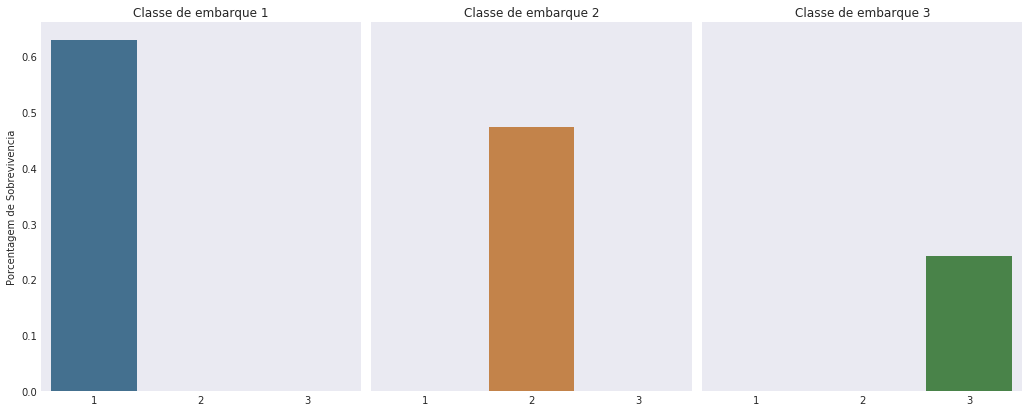

In [532]:
# Retorna a porcentagem de sobreviventes por nivel social/economico
def survival_rate(pclass):
    """
    Args:
        pclass: class value 1,2 or 3
    Returns:
        survival rate as percentage.
    """
    grouped_by_total = dataset_cleaned.groupby(['Pclass']).size()[pclass].astype('float')
    grouped_by_survived= \
        dataset_cleaned.groupby(['Pclass','Survived']).size()[pclass,1].astype('float')
    survived_pct = (grouped_by_survived / grouped_by_total * 100).round(2)
    
    return survived_pct

# Pega a quantidade atual agrupada por pclass e survived
groupedby_class_survived_size = dataset_cleaned.groupby(['Pclass','Survived']).size()

# Print - agrupado por pclass e survived
print (groupedby_class_survived_size)
print ('Classe de embarque 1 - Porcentagem de sobrevivencia: {}%'.format(survival_rate(1)))
print ('-----')
print ('Classe de embarque 2 - Porcentagem de sobrevivencia: {}%'.format(survival_rate(2)))
print ('-----')
print ('Classe de embarque 3 - Porcentagem de sobrevivencia: {}%'.format(survival_rate(3)))


# Gráfico - Agrupado por pclass e survived
g = sns.factorplot(x="Pclass", y="Survived", col="Pclass", data=dataset_cleaned, 
                   saturation=.5, kind="bar", ci=None, size=6, aspect=.8)

# Altera as legendas
(g.set_axis_labels('', 'Porcentagem de Sobrevivencia')
     .set_xticklabels(["1", "2", "3"])
     .set_titles("Classe de Embarque {col_name}")
     .despine(left=True, bottom=True))

titles = ['Classe de embarque 1', 'Classe de embarque 2', 'Classe de embarque 3']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)


Com base nos números totais, parece que os passageiros da Classe de Embarque 3 tinham uma taxa de sobrevivência similar aos da Classe de Embarque 1, com 119 e 136 passageiros sobrevivendo, respectivamente. 

No entanto, olhando para as porcentagens do total de passageiros por classe e os números totais em cada classe, pode-se supor que um passageiro da Classe de Embarque 1 e 2 tiveram mais chances de sobreviver do que um passageiro da Classe de Embarque 3.

Assim fica claro que o fator social e economico contribuiu sim para a taxa de sobrevivencia dos passageiros.

- **Classe de embarque 1 - Porcentagem de sobrevivencia: 62.96%**

- **Classe de embarque 2 - Porcentagem de sobrevivencia: 47.28%**

- **Classe de embarque 3 - Porcentagem de sobrevivencia: 24.24%**


## Pergunta 2

Havia mais homens ou mulheres de baixos niveis sociais e economicos entre os sobreviventes?

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64
---------
Classe de embarque 3 - Porcentagem de sobrevivencia de Mulheres: 50.0%
Classe de embarque 3 - Porcentagem de sobrevivencia de Homens: 13.54%
---------
Classe de embarque 3 - Total em números reais de sobrevivencia de Mulheres: 72.0
Classe de embarque 3 - Total em números reais de sobrevivencia de Homens: 47.0


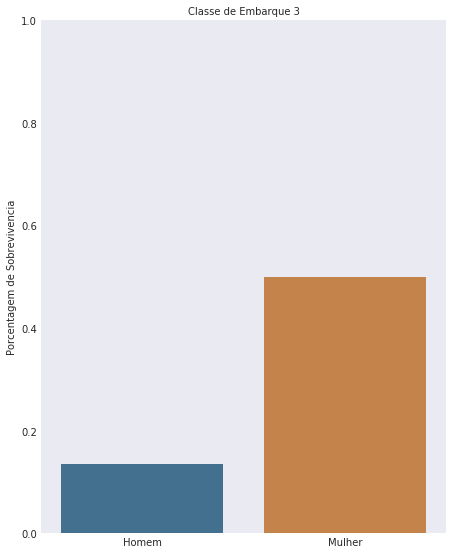

In [533]:
# Retorna a porcentagem de sobreviventes por nivel social/economico e genero
def survival_rate_class_sex(pclass, sex):
    """
    Args:
        pclass: class value 3
        sex: male or female
    Returns:
        survival rate as percentage.
    """
    grouped_by_total = dataset_cleaned.groupby(['Pclass', 'Sex']).size()[pclass,sex].astype('float')
    grouped_by_survived_sex = \
        dataset_cleaned.groupby(['Pclass','Survived','Sex']).size()[pclass,1,sex].astype('float')
    survived_sex_pct = (grouped_by_survived_sex / grouped_by_total * 100).round(2)
    
    return survived_sex_pct

# Retorna o total de sobreviventes por nivel social/economico e genero
def total_survival_class_sex(pclass, sex):
    """
    Args:
        pclass: class value 3
        sex: male or female
    Returns:
        survival rate as percentage.
    """
    grouped_by_total = dataset_cleaned.groupby(['Pclass', 'Sex']).size()[pclass,sex].astype('float')
    grouped_by_survived_sex = \
        dataset_cleaned.groupby(['Pclass','Survived','Sex']).size()[pclass,1, sex].astype('float')    
    return grouped_by_survived_sex


# Pega a quantidade atual agrupada por pclass, survived e genero
groupedby_class_survived_size = dataset_cleaned.groupby(['Pclass','Survived','Sex']).size()

# Print - Agrupado por pclass, survived e sex
print (groupedby_class_survived_size)

print ('---------')
print ('Classe de embarque 3 - Porcentagem de sobrevivencia de Mulheres: {}%'.format(survival_rate_class_sex(3,'female')))
print ('Classe de embarque 3 - Porcentagem de sobrevivencia de Homens: {}%'.format(survival_rate_class_sex(3,'male')))


print ('---------')
print ('Classe de embarque 3 - Total em números reais de sobrevivencia de Mulheres: {}'.format(total_survival_class_sex(3,'female')))
print ('Classe de embarque 3 - Total em números reais de sobrevivencia de Homens: {}'.format(total_survival_class_sex(3,'male')))

# Gráfico - Agrupado por pclass e survived
g = sns.factorplot(x="Sex", y="Survived", col="Pclass", data=dataset_cleaned[(dataset_cleaned['Pclass']==3)], 
                   saturation=.5, kind="bar", ci=None, size=8, aspect=.8)

# Altera as legendas
(g.set_axis_labels('', 'Porcentagem de Sobrevivencia')
     .set_xticklabels(["Homem", "Mulher"])
     .set_titles("Classe de Embarque {col_name}")
     .set(ylim=(0, 1))
     .despine(left=True, bottom=True))

titles = ['Homem', 'Mulher']

Olhando para as porcentagens de sobreviventes de passageiros por classe e genero, pode-se supor que as passageiras mulheres da Classe de Embarque 3 tiveram mais chances de sobreviver do que os passageiros homens da Classe de Embarque 3.

Assim fica claro que o genero dos passageiros contribuiu sim para a taxa de sobrevivencia, não só das classes mais baixas como os da Classe de Embarque 3, mas como das outras também.

Classe de embarque 3 - Porcentagem de sobrevivencia de mulheres: 50.0%
Classe de embarque 3 - Porcentagem de sobrevivencia de homens: 13.54%

## Pergunta 3
Mulheres adultas com criancas e de alta classe social e economica sobreviveram mais do que mulheres adultas sem criancas e de baixa classe?

**Obs:** Nessa análise foram consideradas como mulheres adultas passageiros do genero feminino e que tivessem a idade maior ou igual a 18 anos.

In [534]:
# Verificando apenas os passageiros maiores de 18 anos
data_age = dataset_cleaned.loc[(dataset_cleaned['Age'] >=18) &
                               (dataset_cleaned['Sex'] == 'female')]
                                
data_age.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
8,1,3,female,27.0,0,2,S
11,1,1,female,58.0,0,0,S


In [535]:
# Verificando apenas passageiros do genero feminino que não possuiam filhos
titanic_data_woman_not_parents = dataset_cleaned.loc[
    (dataset_cleaned['Sex'] == 'female') &
    (dataset_cleaned['Parch'] > 0)]

titanic_data_woman_not_parents.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
8,1,3,female,27.0,0,2,S
10,1,3,female,4.0,1,1,S
24,0,3,female,8.0,3,1,S
25,1,3,female,38.0,1,5,S
43,1,2,female,3.0,1,2,C


In [536]:
# Verificando apenas passageiros do genero feminino que sobreviveram, acima dos 20 anos e que não possuiam filhos
titanic_data_woman_parents_maybe = dataset_cleaned.loc[
    (dataset_cleaned['Sex'] == 'female') &
    (dataset_cleaned['Parch'] == 0) & 
    (dataset_cleaned['Age'] > 20) & 
    (dataset_cleaned['Age'] != float('NaN')) &
    (dataset_cleaned['Survived'] == 1) &
    (dataset_cleaned['Pclass'] == 1)]

titanic_data_woman_parents_maybe.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
1,1,1,female,38.0,1,0,C
3,1,1,female,35.0,1,0,S
11,1,1,female,58.0,0,0,S
52,1,1,female,49.0,1,0,C
61,1,1,female,38.0,0,0,NaN


In [537]:
# verificando apenas passageiros do genero feminino que sobreviveram, 
# acima dos 20 anos, com possíveis filhos e que pertenciam a alta classe social
titanic_data_woman_parents = dataset_cleaned.loc[
    (dataset_cleaned['Sex'] == 'female') &
    (dataset_cleaned['Parch'] > 0) & 
    (dataset_cleaned['Age'] >= 18) & 
    (dataset_cleaned['Age'] != float('NaN')) &
    (dataset_cleaned['Survived'] == 1) &
    (dataset_cleaned['Pclass'] == 1)]

titanic_data_woman_parents_maybe.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
1,1,1,female,38.0,1,0,C
3,1,1,female,35.0,1,0,S
11,1,1,female,58.0,0,0,S
52,1,1,female,49.0,1,0,C
61,1,1,female,38.0,0,0,NaN


In [538]:
# Retorna a porcentagem de sobreviventes por genero, classe e quantidade de filhos
def survival_rate_parents(pclass, sex, parch):
    """
    Args:
        pclass: class value 1
        sex: female
        parch: class value >= 0
    Returns:
        survival rate as percentage.
    """
    grouped_by_total = dataset_cleaned.groupby(['Pclass', 'Sex', 'Parch']).size()[pclass,sex, parch].astype('float')
    grouped_by_survived_sex = \
        dataset_cleaned.groupby(['Pclass','Survived','Sex', 'Parch']).size()[pclass,1,sex, parch].astype('float')
    survived_sex_pct = (grouped_by_survived_sex / grouped_by_total * 100).round(2)
    
    return survived_sex_pct

print ('Mulheres Sem criancas: {}%'.format(survival_rate_parents(1,'female', 0)))
print ('Mulheres Com um filho: {}%'.format(survival_rate_parents(1,'female', 1)))
print ('Mulheres Com dois filho: {}%'.format(survival_rate_parents(1,'female', 2)))

Mulheres Sem criancas: 98.44%
Mulheres Com um filho: 100.0%
Mulheres Com dois filho: 84.62%


Ao tentar realizar a análise acima, me deparei com um problema referente aos dados da coluna **Parch**. Segundo a descricao de dados, essa coluna é referente a **Número de pais/criancas a bordo**. Logo, uma mulher com idade maior ou igual a 18 anos poderia estar no navio acompanhada dos seus pais e não necessáriamente de seus filhos. Sendo assim, por falta de dados conclusivos não será possivel definir corretamente a taxa de sobrivencia entre mulheres com filhos e as sem filhos.

## Pergunta 4
Os passageiros que pertenciam a altas classes sociais e que sobreviveram embarcaram em qual porto?

In [539]:
survivor_class_embarked_c = dataset_cleaned.loc[(dataset_cleaned['Pclass'] == 1) &
                                          (dataset_cleaned['Survived'] == 1)  &
                                          (dataset_cleaned['Embarked'] == 'C')]
survivor_class_embarked_c.sum()


Survived                                                   59
Pclass                                                     59
Sex         femalefemalefemalemalefemalefemalemalefemalefe...
Age                                                      1903
SibSp                                                      28
Parch                                                      18
Embarked    CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
dtype: object

In [544]:
survivor_class_embarked_q = dataset_cleaned.loc[(dataset_cleaned['Pclass'] == 1) &
                                          (dataset_cleaned['Survived'] == 1)  &
                                          (dataset_cleaned['Embarked'] == 'Q')]
survivor_class_embarked_q.sum()

Survived         1
Pclass           1
Sex         female
Age             33
SibSp            1
Parch            0
Embarked         Q
dtype: object

In [543]:
survivor_class_embarked_s = dataset_cleaned.loc[(dataset_cleaned['Pclass'] == 1) &
                                          (dataset_cleaned['Survived'] == 1)  &
                                          (dataset_cleaned['Embarked'] == 'S')]
survivor_class_embarked_s.count()

Survived    74
Pclass      74
Sex         74
Age         66
SibSp       74
Parch       74
Embarked    74
dtype: int64

A taxa de Passageiros que embarcaram no Porto de Cherbourg foi de 25.0%
A taxa de Passageiros que embarcaram no Porto de Queenstown foi de 1.0%
A taxa de Passageiros que embarcaram no Porto de Southampton foi de 74.0%


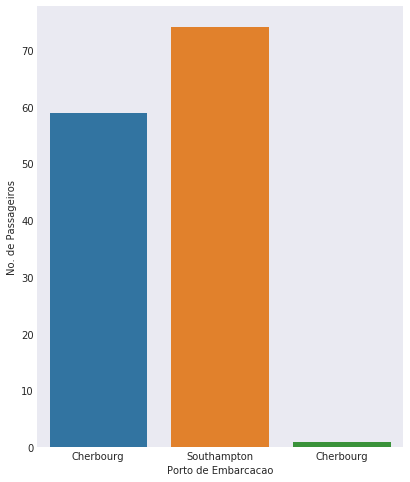

In [545]:
def survival_rate_class_embarked(pclass, embarked):
    """
    Args:
        pclass: class value 1
        embarked: C, Q or S
    Returns:
        survival rate as percentage.
    """
    grouped_by_total = dataset_cleaned.groupby(['Pclass', 'Embarked']).size()[pclass, embarked].astype('float')
    grouped_by_survived_embarked = \
        dataset_cleaned.groupby(['Pclass','Survived', 'Embarked']).size()[pclass, 1, embarked].astype('float')
    survived_class_embarked_pct = (grouped_by_survived_embarked / grouped_by_total * 100).round(2)
    
    return grouped_by_survived_embarked

print ('A taxa de Passageiros que embarcaram no Porto de Cherbourg foi de {}%'.format(survival_rate_class_embarked(3, 'C')))
print ('A taxa de Passageiros que embarcaram no Porto de Queenstown foi de {}%'.format(survival_rate_class_embarked(1, 'Q')))
print ('A taxa de Passageiros que embarcaram no Porto de Southampton foi de {}%'.format(survival_rate_class_embarked(1, 'S')))

# Gráfico - Contagem real de passageiros sobreviventes por Pclass

g = sns.factorplot('Embarked', col='Pclass', data=dataset_cleaned[(dataset_cleaned['Pclass']== 1)  &
                                          (dataset_cleaned['Survived'] == 1) ], kind='count', size=7, aspect=.8)

# Altera as legendas
(g.set_axis_labels('Porto de Embarcacao', 'No. de Passageiros')
    .set_xticklabels(["Cherbourg", "Southampton", "Cherbourg"])
    .set_titles('{col_name}')
)
titles = ['', '', '']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)


**Total de Passageiros sobreviventes que embarcaram no porton de Cherbourg:** 59

**Total de Passageiros sobreviventes que embarcaram no porton de Southampton:** 74

**Total de Passageiros sobreviventes que embarcaram no porton de Queenstown:** 1


Com base na análise de dados feita acima é possível concluir que a maioria dos sobreviventes pertencentes a classe de embarque 1, embarcaram no porto de Southampton. Um motivo para o ocorrido deve-se pelo fato que o ponto de partida do Titanic  aconteceu nesse porto. Sendo assim, a maior parte das vagas da embarcacao foram ofertadas para quem estava naquele local e os restantes das vagas devem ter sido oferecidas nos demais portos.

## Conclusão

Os resultados da análise dos dados do Titanic puderam indicar que classe e genero (principalmente se voce fosse uma mulher com posicao socioeconomica superior e pertencente a primeira classe), dariam uma melhor chance de sobrevivência quando a tragédia ocorresse no navio. A idade nessa análise não se mostrou como um fator importante. Ficou visivel também que se voce fosse um homem na terceira classe, teria menores chances de sobrevivencia do que uma mulher.

## Referências 

https://www.kaggle.com/c/titanic/data

http://seaborn.pydata.org/generated/seaborn.catplot.html

https://pt.wikipedia.org/wiki/RMS_Titanic 